# Counting points of $y^2=x(x-1)(x-\lambda)$ over $\mathbf{F}_{p}$ $p$-adically

Notations:
- Lefschetz trace formula, Weil's conjectures 
- Regular differentials, Hasse-Mannin matrix
- Frobenius trace and hypergeometric function ${}_{2}F_{1}(\frac{1}{2}, \frac{1}{2}, 1;z)$
- Teichmüller lift 
- Supersingular locus, Igusa polynomial
- Expansion of a series in an affinoid, analytical continuation
- $p$-adic characterization of Weil numbers in finite steps

## TODO: write functions for any $\lambda$ and $\mathbf{F}_{q}$.
Here we only work the case $p=5$, $\lambda=2$ as an example.

# Regular differential satisfies the Picard-Fuchs equation with boundry condition $y(0)=1$

References: <a knowl="rieman_roch">Riemann Roch Theorems</a>
- The curve book

The hypergeometric equation is given by 
$$z(1-z)\frac {d^2w}{dz^2} + \left[c-(a+b+1)z \right] \frac {dw}{dz} - ab\,w = 0$$
in the special case $a=b=\frac{1}{2}$, $c=1$, we get exactly the Picard-Fuchs equations satisfied by the periods on the elliptic curve under consideration
$$\lambda(\lambda-1)\frac{d^2\omega}{d\lambda^2}+(2\lambda-1)\frac{d\omega}{d\lambda}+\frac{1}{4}\omega =0$$





1
          2 LegendreQ[-(-), -1 + 2 x]
                        2
{{y[x] -> ---------------------------}}
                      Pi
              1
2 LegendreQ[-(-), -1 + 2 z]
              2
---------------------------
            Pi
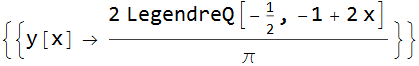
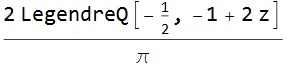

In [16]:
DSolve[{y[x]/4 + (2 x - 1) y'[x] + (x) (x - 1) y''[x] == 0, 
  y[0] == 1}, y[x], x]
  f[z_]=2*LegendreQ[-1/2, -1+2*z]/Pi

1
2 LegendreQ[-(-), -1 + 2 z]
              2
---------------------------
            Pi
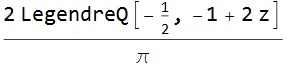

In [7]:
f[z_]=2*LegendreQ[-1/2, -1+2*z]/Pi

2 EllipticK[z]
--------------
      Pi
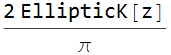

In [18]:
f[z_]= Hypergeometric2F1[1/2, 1/2,1,z]

# Count point modulo $p$

- Truncation of the hypergeometric function up to order $\frac{p-1}{2}$
- TODO: write the process as a function instead of commands

2
    z   9 z        3
1 + - + ---- + O[z]
    4    64
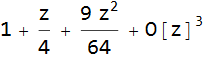

In [19]:
Series[f[z], {z, 0,2}]

Note that we should understand the Igusa polynomial in $\mathbf{F}_{5}$

In [25]:
Igusa[z_]=1-z+z^2

2
1 - z + z

In our case, we have $\lambda = 2$. We can already check the relation $-\#C_{\lambda}\equiv (-1)^{\frac{p-1}{2}}\mathrm{Igusa}(\lambda)$. Namely $((-1)^{\frac{5-1}{2}}\mathrm{Igusa}(2)=3) \equiv (-\#C_{2}=-7)\mod 5$

Now we check $p$-adically that the Frobenius eigenvalue $\mathrm{Tr}(\mathrm{Frob}^{*}, \mathrm{H}^{1}(X, \mathcal{O}))$ is $-1+2i$ if we specialize $i\in \mathbf{Z}_{5}$ to $2\in \mathbf{Z}/5\hookrightarrow 7\in \mathbf{Z}_{25}\hookrightarrow \dots$

- In $\mathbf{Z}/5$:

$-1+2i = -1+2*2=3$ 
- In $\mathbf{Z}/25$, we have to check that

$-1+2i=-1+2*7 = 13$

TO be more precise, we want to work out the following theorem in [The cohomology of Monsky and Washnitzer](http://www.numdam.org/article/MSMF_1986_2_23__33_0.pdf)

![Dwork, p-adic counting theorem](../Images/dwork.jpg)

EllipticK[z]
-------------
           5
EllipticK[z ]
           2       3         4          5          6          7             8
    z   9 z    25 z    1225 z    12415 z    12175 z    36585 z    15194825 z
1 + - + ---- + ----- + ------- - -------- - -------- + -------- + ----------- + 
    4    64     256     16384     65536     1048576    4194304    1073741824
 
              9               10               11                12                 13
    67462425 z    4275734935 z     1090239575 z     70774225585 z     474875351225 z
>   ----------- - -------------- - -------------- + --------------- + ---------------- + 
    4294967296     68719476736      274877906944    17592186044416     70368744177664
 
                   14                    15                      16
    8886741336225 z     155786447656695 z     10162848999896375 z
>   ----------------- - ------------------- - --------------------- + 
    1125899906842624     4503599627370496      4611686018427387904
 
                       17                        18                        19
    45849938237594345 z     1247335893197976225 z     5962602627694219025 z
>   --------------------- + ----------------------- + ----------------------- - 
    18446744073709551616     295147905179352825856    1180591620717411303424
 
                            20
    1749381721804644171735 z         21
>   -------------------------- + O[z]
     75557863725914323419136
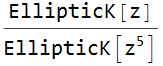
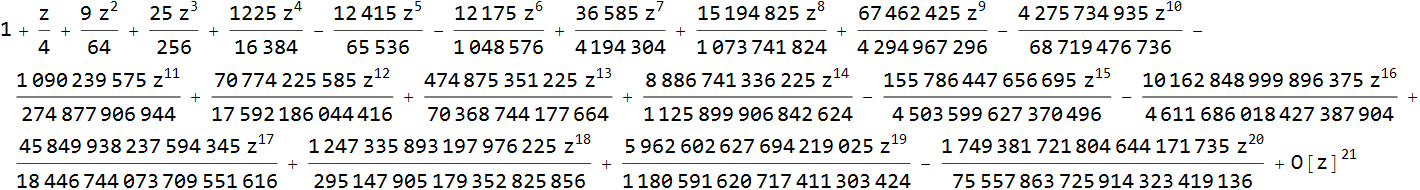

In [26]:
dwork[z_]=f[z]/f[z^5]
Series[dwork[z], {z, 0,20}]

# Subtlety: Analytical continuation

Consider the simple fact that 
$$f(z)=1+z+z^2+z^3+\dots$$
If we want to compute $f(7)$, we can't just plug in $z=7$ since this series doesn't converge, that's not a big deal, we can analytically continuate $f(z)$ simply by multiplying $g(z)=(1-z)$, then $(1-z)f(z)=h(z)$(in this case $h(z)$ is just $1$), where $h(z)$ is holomorphic, for points different from the zeros of $g(z)$, we can compute the value of $f(z)$ as $\frac{h(z)}{g(z)}$, notice that now both $g(z)$ and $h(z)$ are well-defined at the point we want to compute the value of. 

Similarly, the Dwork function $\frac{f(z)}{f(z^{5})}$ doesn't converge $5$-adically. We need to consider the analytical continuation by multiplying certain power of the Igusa polynomial(That's the content of the $|Igusa(\lambda)|=1$ condition in the theorem). 

TO check the $\mathbf{Z}/25$ case, we only need to consider $\mathrm{dwork}(z)\mathrm{Igusa}^{k}(z)$, by experimenting, it seems $k=p$ suffice(somebody must have prove something like that the order of pole the Dwork function localized at the vanishing locus of the Igusa polynomial should is $p$,?) 

2 5
(1 - z + z )  EllipticK[z]
--------------------------
                 5
      EllipticK[z ]
                2         3           4            5             6              7
    19 z   889 z    6875 z    642185 z    2822451 z    39537121 z    111338539 z
1 - ---- + ------ - ------- + --------- - ---------- + ----------- - ------------ + 
     4       64       256       16384       65536        1048576       4194304
 
                 8                9                 10                  11
    18996349385 z    55782930075 z    772607823961 z     2378558893259 z
>   -------------- - -------------- + ---------------- - ----------------- + 
      1073741824       4294967296       68719476736        274877906944
 
                    12                   13                     14
    83488948285041 z     42084101314075 z     2504643510878575 z
>   ------------------ - ------------------ - -------------------- + 
      17592186044416       70368744177664       1125899906842624
 
                       15                         16                         17
    14334815606838325 z     12193599809934014775 z     22468877261006844725 z
>   --------------------- - ------------------------ + ------------------------ + 
      4503599627370496        4611686018427387904        18446744073709551616
 
                          18                           19
    91450049721554369425 z     1678268652539232078275 z
>   ------------------------ - -------------------------- + 
     295147905179352825856       1180591620717411303424
 
                              20                             21
    134199299321009560795625 z     431816264345355400221875 z
>   ---------------------------- - ---------------------------- + 
      75557863725914323419136        302231454903657293676544
 
                               22                              23
    2906106048714043602056625 z     5897050417592930093734725 z
>   ----------------------------- + ----------------------------- - 
      4835703278458516698824704      19342813113834066795298816
 
                                  24                                  25
    4837924767196170616908932175 z     23491931630710437719453400525 z
>   -------------------------------- + --------------------------------- - 
      4951760157141521099596496896       19807040628566084398385987584
 
                                    26                                   27
    298571221947105742283963460975 z     472972413238280160141055503725 z
>   ---------------------------------- + ---------------------------------- + 
      316912650057057350374175801344      1267650600228229401496703205376
 
                                      28                                      29
    20786845034753701930668208273825 z     236229791450091876771146197576075 z
>   ------------------------------------ - ------------------------------------- + 
      81129638414606681695789005144064       324518553658426726783156020576256
 
                                        30
    4529962126056965550730481785735025 z         31
>   -------------------------------------- + O[z]
      5192296858534827628530496329220096
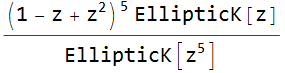
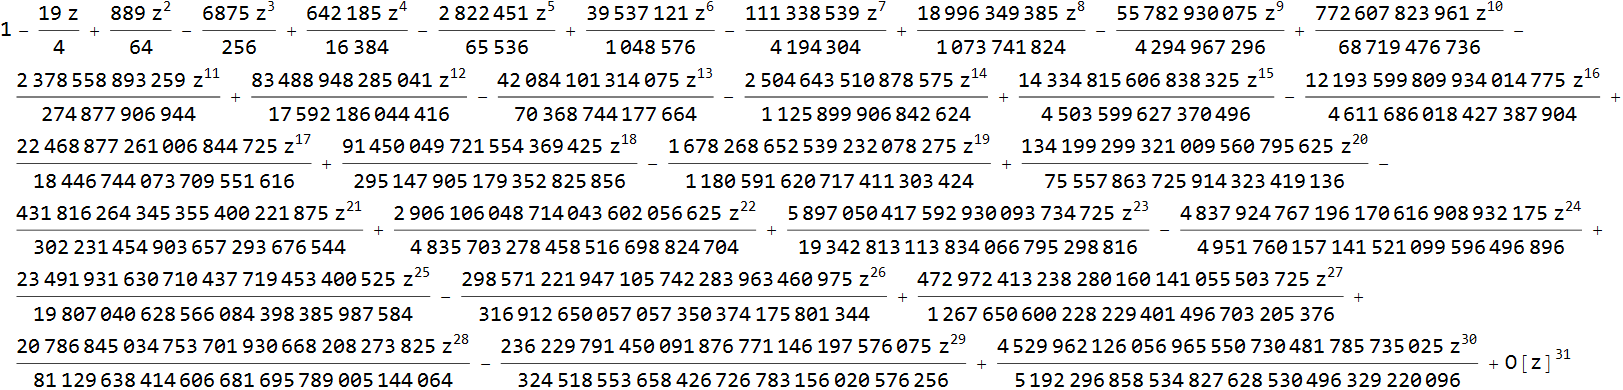

In [28]:
h[z_]= (f[z]/f[z^5])*(1-z+z^2)^5
Series[h[z], {z, 0,30}]

We find that from the $x^{13}$-th term, all the numerators are divisable by $25$. To compute $\mathrm{dwork}(7)$, we only need to compute $\frac{h(7)}{\mathrm{Igusa}(7)}$ in $\mathbf{Z}/25$. Remember that $i$ is specialized to $7$ in $\mathbf{Z}/25$, $$\mathrm{Igusa}^5(7)=(1-z+z^2)^{5}=(-7)^{5}=-(-1)(-1)(-7)=7$$


In other words, we have to check that in $\mathbf{Z}/25$

$$-1+2i = 13 = \mathrm{Igusa}^{5}(7)h(7)$$


2          3            4             5              6
    133 z   6223 z    48125 z    4495295 z    19757157 z    276759847 z
7 - ----- + ------- - -------- + ---------- - ----------- + ------------ - 
      4       64        256        16384         65536        1048576
 
               7                 8                 9                  10
    779369773 z    132974445695 z    390480510525 z    5408254767727 z
>   ------------ + --------------- - --------------- + ----------------- - 
      4194304        1073741824        4294967296         68719476736
 
                    11                    12
    16649912252813 z     584422637995287 z         13
>   ------------------ + ------------------- + O[z]
       274877906944        17592186044416
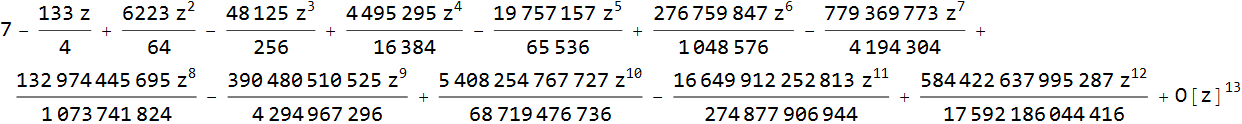

In [30]:
p[z_]=7*Series[h[z], {z, 0, 12}]

133   6223    48125   4495295    19757157   276759847    779369773   132974445695
{7, -(---), ----, -(-----), -------, -(--------), ---------, -(---------), ------------, 
       4     64      256     16384      65536      1048576      4194304     1073741824
 
      390480510525   5408254767727    16649912252813   584422637995287
>   -(------------), -------------, -(--------------), ---------------}
       4294967296     68719476736      274877906944    17592186044416
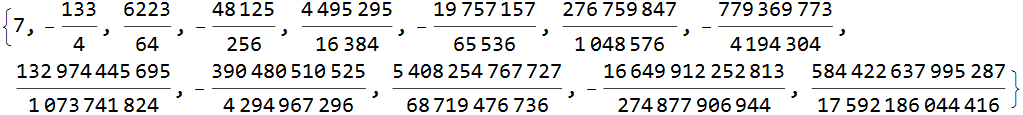

In [33]:
CoefficientList[p[z],z]

Now we switch to SageMath to finish the last few computations.